In [1]:
import torch
import torch.nn as nn
import models.CNN as CNNModel
import models.UNet as UNetModel
import importlib
from torchvision import transforms
from Dataset import AudioEmotionDataset
import numpy as np
from torch.utils.data import DataLoader



In [2]:
# Device configuration
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(device)


mps


In [4]:
def to_tensor(array:np.ndarray)->torch.Tensor:
    return torch.from_numpy(array).float()

def normalization(tensor:torch.Tensor)->torch.Tensor:
    mean = tensor.mean()
    std = tensor.std()
    return (tensor - mean) / std

val_set = torch.load("data/SplitedData/VAL_SET.pth")
val_loader =DataLoader(val_set,batch_size=32,shuffle=False)


### CNN Model

Classification Report:
              precision    recall  f1-score   support

     neutral       0.85      0.78      0.82        37
        calm       0.85      0.98      0.91        61
       happy       0.93      0.78      0.85        87
         sad       0.81      0.94      0.87        77
       angry       0.93      0.91      0.92        91
     fearful       0.88      0.88      0.88        66
     disgust       0.85      0.83      0.84        77
   surprised       0.91      0.90      0.91        80

    accuracy                           0.88       576
   macro avg       0.88      0.88      0.87       576
weighted avg       0.88      0.88      0.88       576



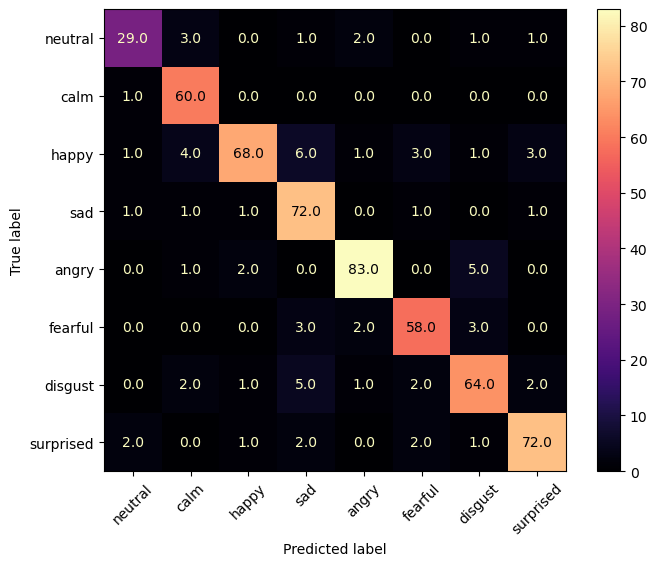

In [ ]:
importlib.reload(CNNModel)

CNN_saved_model_states = torch.load('CNN/BEST_MODEL.pth')

cnn_model = CNNModel.CNN(input_length=173, num_classes=8)
cnn_model.load_state_dict(CNN_saved_model_states)
cnn_model.to(device)

CNNModel.get_all_metrics(cnn_model,val_loader,device)


### UNet

Classification Report:
              precision    recall  f1-score   support

     neutral       0.44      0.51      0.47        37
        calm       0.79      0.87      0.83        61
       happy       0.85      0.71      0.78        87
         sad       0.68      0.74      0.71        77
       angry       0.88      0.81      0.85        91
     fearful       0.71      0.80      0.75        66
     disgust       0.76      0.75      0.76        77
   surprised       0.78      0.72      0.75        80

    accuracy                           0.75       576
   macro avg       0.74      0.74      0.74       576
weighted avg       0.76      0.75      0.76       576



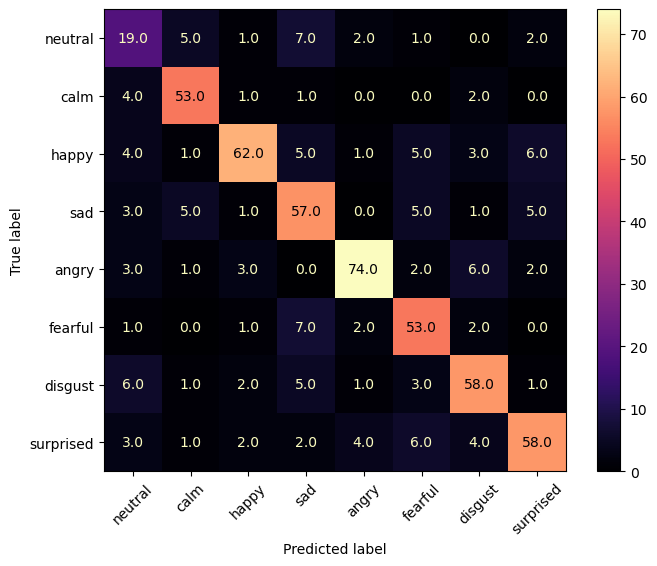

In [ ]:
importlib.reload(UNetModel)

UNet_saved_model_states = torch.load('UNet/UNet.pth')

UNet_model = UNetModel.UNet()
UNet_model.load_state_dict(UNet_saved_model_states)
UNet_model.to(device)

# model's Metrics
UNetModel.get_all_metrics(UNet_model, val_loader, device)